In [ ]:


# URL du fichier texte
url = 'https://www.gutenberg.org/cache/epub/55860/pg55860.txt'

# Faire une requête HTTP pour obtenir le contenu du fichier
response = requests.get(url)

# Spécifier le nom du fichier à sauvegarder
le_père_goriot  = 'pg55860.txt'

# Écrire le contenu dans un fichier texte
with open(le_père_goriot , 'w', encoding='utf-8') as file:
    file.write(response.text)

print(f"Le fichier a été téléchargé et sauvegardé sous le nom {boule_de_suif}")


NameError: name 'requests' is not defined

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download fr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 14.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [34]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle spaCy
nlp = spacy.load("fr_core_news_md")


In [ ]:
# Charger les textes (nom des fichiers téléchargés sur Colab)
texts = {
    "Maupassant": open("boule_de_suif.txt", "r", encoding="utf-8").read(),
    "Zola": open("germinal.txt", "r", encoding="utf-8").read(),
    "Balzac": open("Balzac.txt", "r", encoding="utf-8").read()
}

# Augmenter la limite maximale de longueur
nlp.max_length = 100000000  # Vous pouve

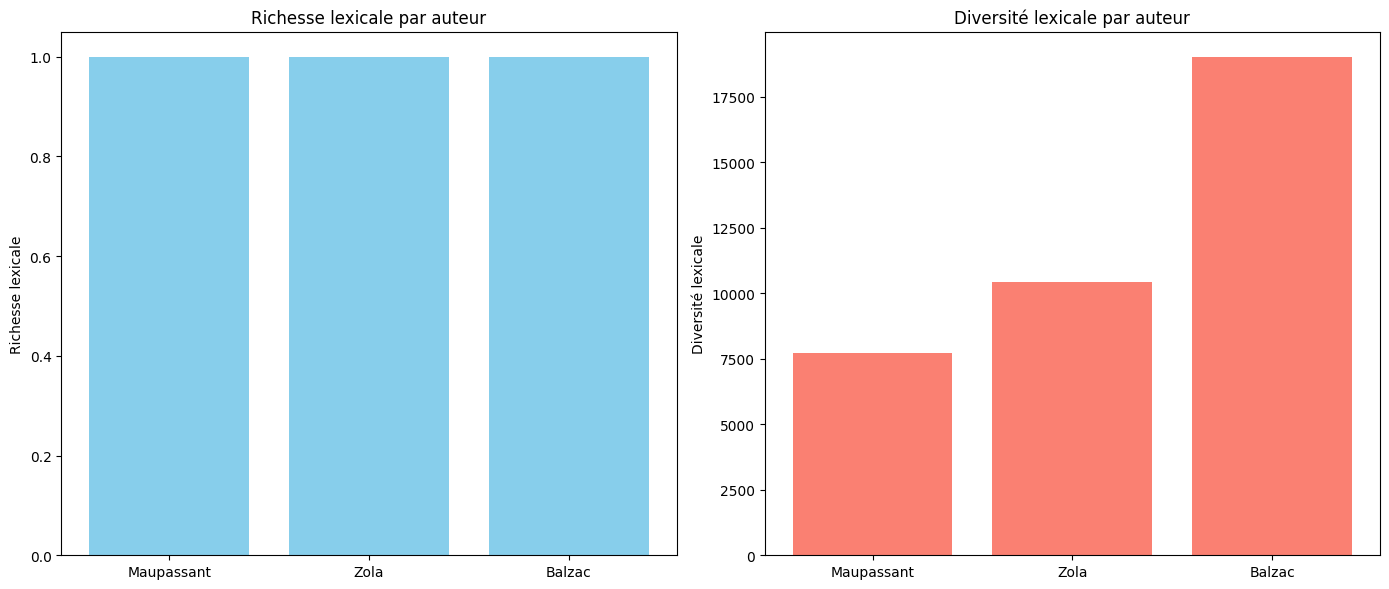

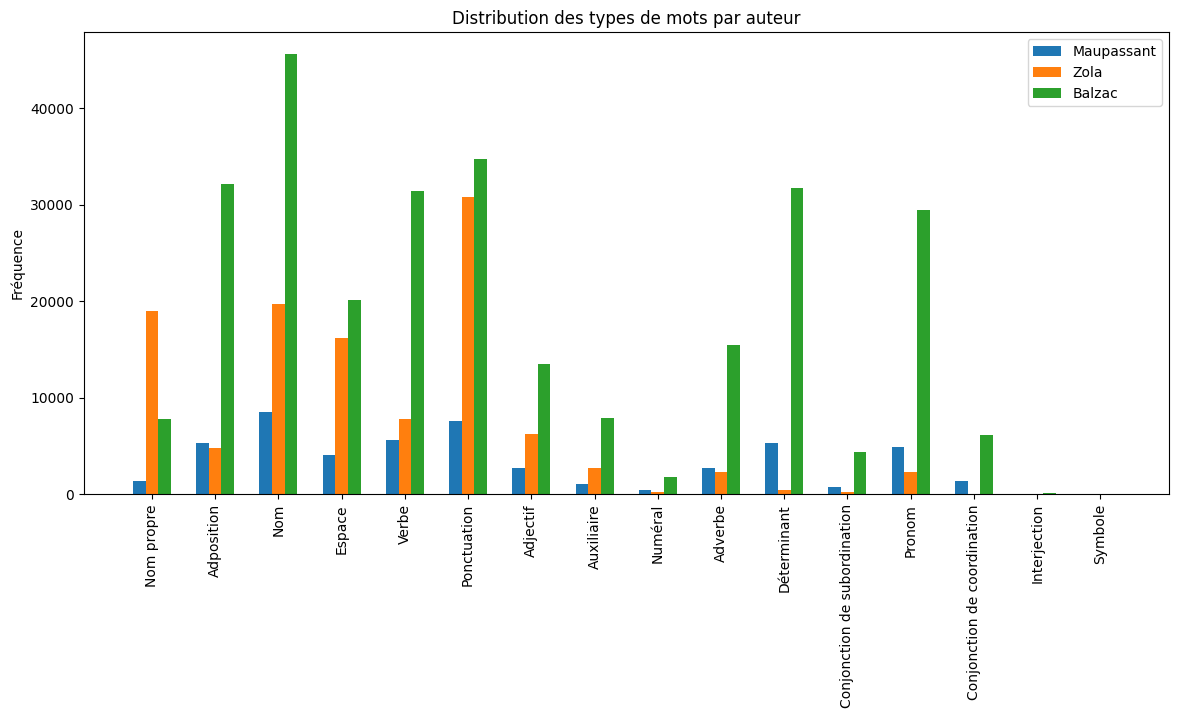

In [ ]:
def pos_distribution(doc):
    pos_counts = Counter([token.pos_ for token in doc])
    return pos_counts

# Traduction des labels POS
pos_translation = {
    "ADJ": "Adjectif",
    "ADP": "Adposition",
    "ADV": "Adverbe",
    "AUX": "Auxiliaire",
    "CCONJ": "Conjonction de coordination",
    "DET": "Déterminant",
    "INTJ": "Interjection",
    "NOUN": "Nom",
    "NUM": "Numéral",
    "PART": "Particule",
    "PRON": "Pronom",
    "PROPN": "Nom propre",
    "PUNCT": "Ponctuation",
    "SCONJ": "Conjonction de subordination",
    "SYM": "Symbole",
    "VERB": "Verbe",
    "SPACE": "Espace"
}

# Analyser les textes
results = {}
pos_results = {}
for author, text in texts.items():
    doc = nlp(text)
    pos_counts = pos_distribution(doc)
    # Retirer la légende "X"
    if "X" in pos_counts:
        del pos_counts["X"]
    pos_results[author] = pos_counts
    results[author] = {
        "richesse_lexicale": len(set(doc)) / len(doc),
        "diversité_lexicale": len(Counter([token.text for token in doc if token.is_alpha]))
    }

# Traduire les labels POS
translated_pos_labels = [pos_translation.get(pos, pos) for pos in pos_results["Maupassant"].keys()]
pos_data = {author: [pos_results[author].get(pos, 0) for pos in pos_results["Maupassant"].keys()] for author in pos_results}

# Visualisation des résultats de richesse et diversité lexicale
labels = results.keys()
richesse_lexicale = [results[author]["richesse_lexicale"] for author in labels]
diversité_lexicale = [results[author]["diversité_lexicale"] for author in labels]

x = range(len(labels))

plt.figure(figsize=(14, 6))

# Richesse lexicale
plt.subplot(1, 2, 1)
plt.bar(x, richesse_lexicale, color='skyblue')
plt.xticks(x, labels)
plt.ylabel('Richesse lexicale')
plt.title('Richesse lexicale par auteur')

# Diversité lexicale
plt.subplot(1, 2, 2)
plt.bar(x, diversité_lexicale, color='salmon')
plt.xticks(x, labels)
plt.ylabel('Diversité lexicale')
plt.title('Diversité lexicale par auteur')

plt.tight_layout()
plt.show()

# Visualisation des types de mots
x = range(len(translated_pos_labels))
width = 0.2

plt.figure(figsize=(14, 6))

for i, author in enumerate(pos_results.keys()):
    plt.bar([p + width*i for p in x], pos_data[author], width=width, label=author)

plt.xticks([p + width for p in x], translated_pos_labels, rotation=90)
plt.ylabel('Fréquence')
plt.title('Distribution des types de mots par auteur')
plt.legend()
plt.show()

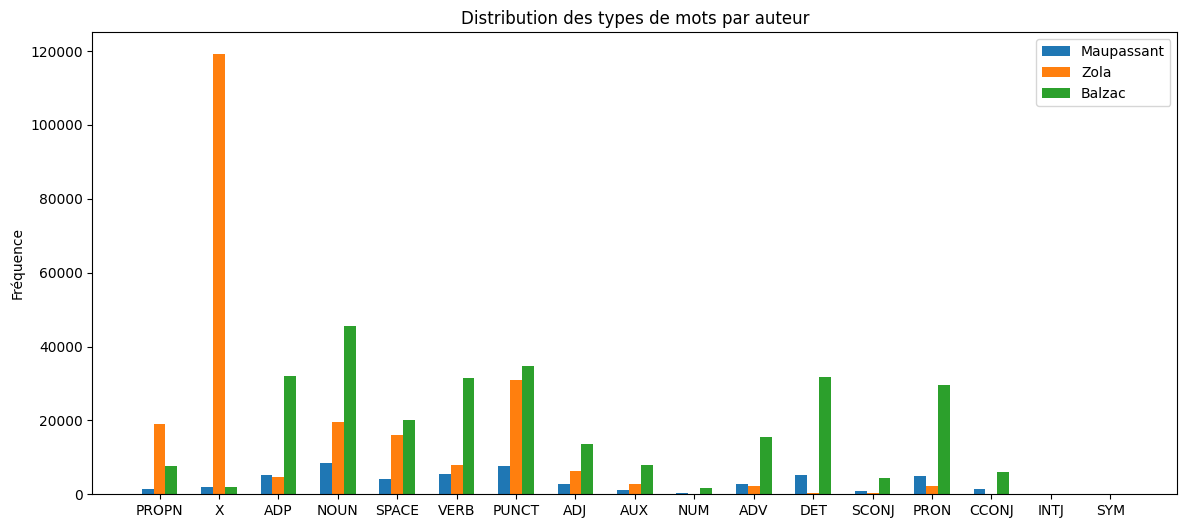

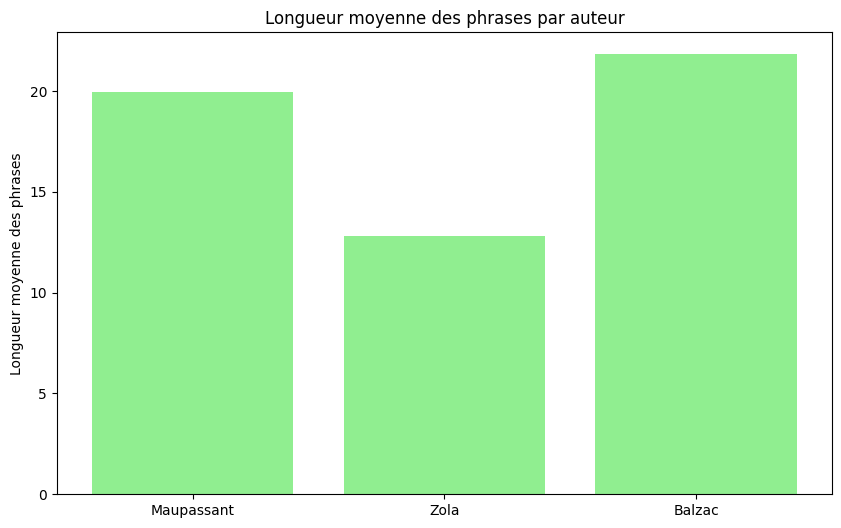

In [ ]:
lengths_values = [lengths_results[author] for author in labels]

plt.figure(figsize=(10, 6))
plt.bar(range(len(labels)), lengths_values, color='lightgreen')
plt.xticks(range(len(labels)), labels)
plt.ylabel('Longueur moyenne des phrases')
plt.title('Longueur moyenne des phrases par auteur')
plt.show()


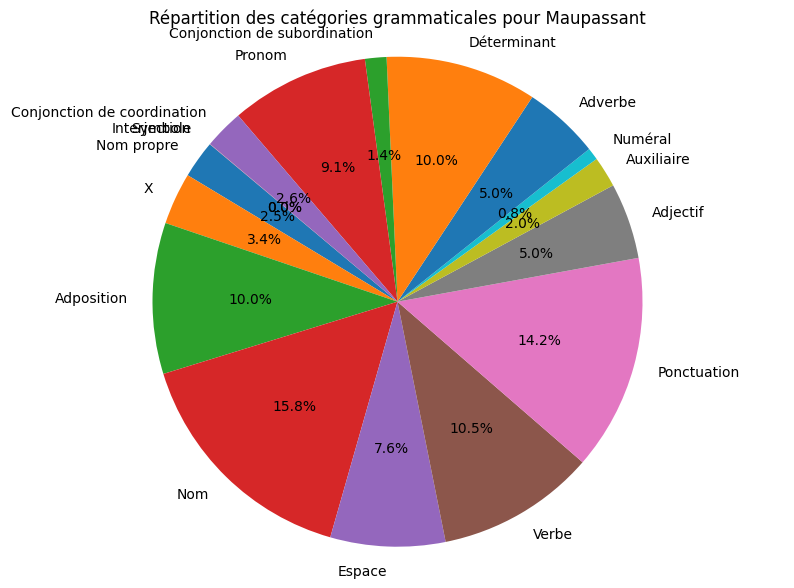

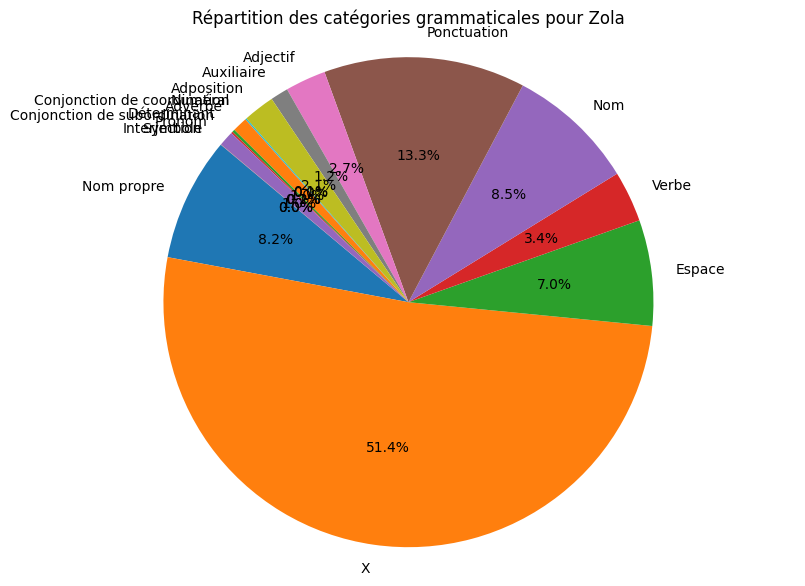

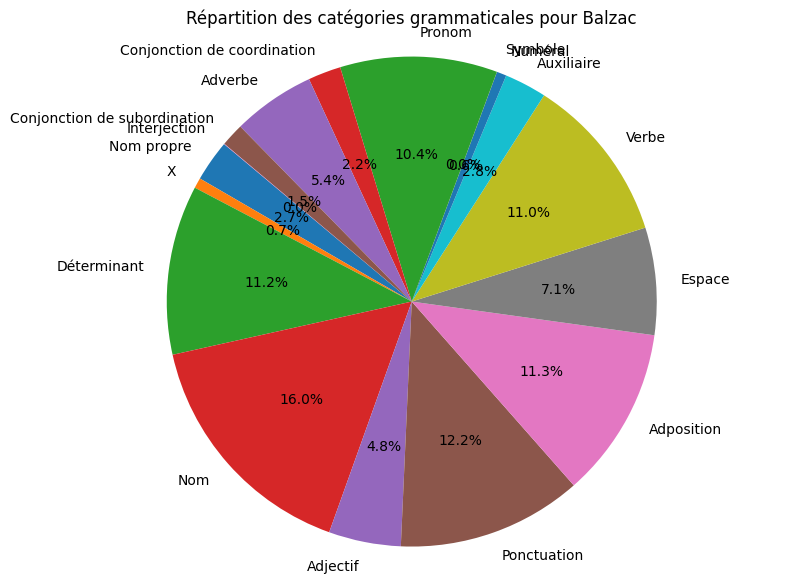

In [ ]:
def plot_pos_pie_chart(doc, author):
    pos_counts = pos_distribution(doc)
    pos_labels = [pos_translation.get(pos, pos) for pos in pos_counts.keys()]
    pos_sizes = pos_counts.values()

    plt.figure(figsize=(10, 7))
    plt.pie(pos_sizes, labels=pos_labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Répartition des catégories grammaticales pour {author}')
    plt.show()

for author, text in texts.items():
    doc = nlp(text)
    plot_pos_pie_chart(doc, author)


In [ ]:
# Fonction pour calculer la richesse lexicale
def lexical_richness(doc):
    words = [token.text for token in doc if token.is_alpha]
    return len(set(words)) / len(words)

# Fonction pour calculer la diversité lexicale
def lexical_diversity(doc):
    words = [token.text for token in doc if token.is_alpha]
    word_freq = Counter(words)
    return len(word_freq)


In [ ]:
def lexical_diversity(doc):
    words = [token.text for token in doc if token.is_alpha]
    word_freq = Counter(words)
    return len(word_freq)

In [ ]:
# Analyser les textes
results = {}
for author, text in texts.items():
    doc = nlp(text)
    results[author] = {
        "richesse_lexicale": lexical_richness(doc),
        "diversité_lexicale": lexical_diversity(doc)
    }

# Afficher les résultats
for author, stats in results.items():
    print(f"{author}: Richesse lexicale = {stats['richesse_lexicale']:.2f}, Diversité lexicale = {stats['diversité_lexicale']}")


Maupassant: Richesse lexicale = 0.20, Diversité lexicale = 7740
Zola: Richesse lexicale = 0.06, Diversité lexicale = 10424
Balzac: Richesse lexicale = 0.09, Diversité lexicale = 19035


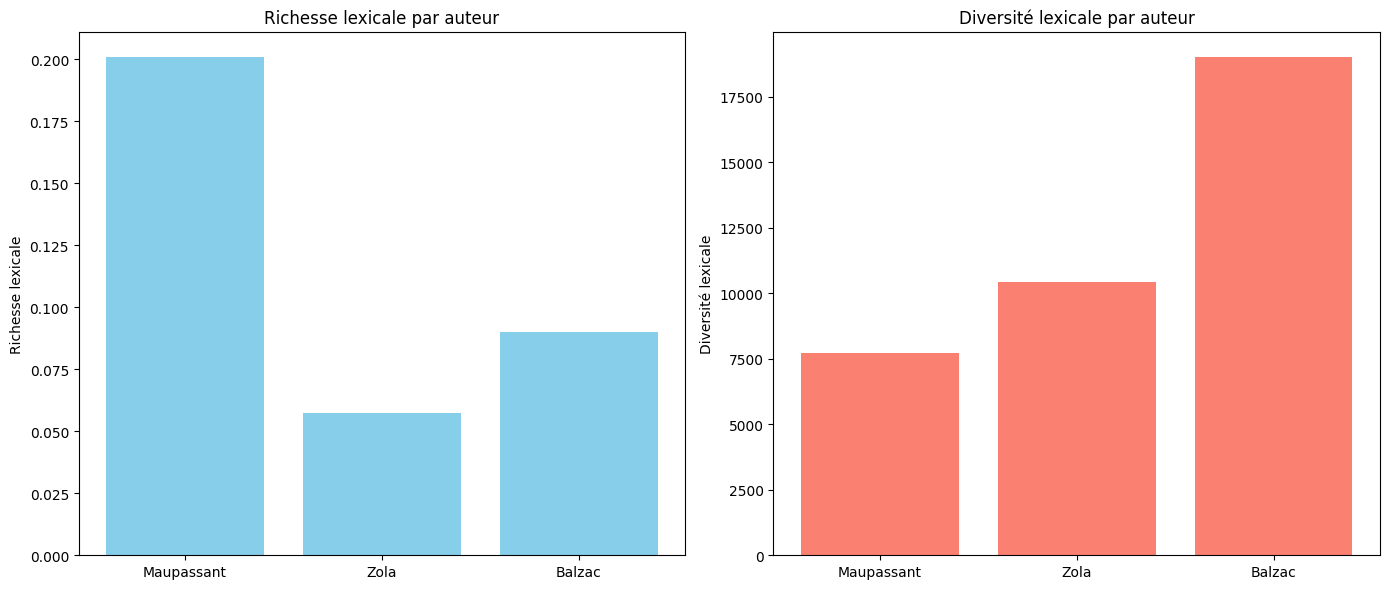

In [ ]:
# Visualisation des résultats de richesse et diversité lexicale
labels = list(results.keys())
richesse_lexicale = [results[author]["richesse_lexicale"] for author in labels]
diversité_lexicale = [results[author]["diversité_lexicale"] for author in labels]

x = range(len(labels))

plt.figure(figsize=(14, 6))

# Richesse lexicale
plt.subplot(1, 2, 1)
plt.bar(x, richesse_lexicale, color='skyblue')
plt.xticks(x, labels)
plt.ylabel('Richesse lexicale')
plt.title('Richesse lexicale par auteur')

# Diversité lexicale
plt.subplot(1, 2, 2)
plt.bar(x, diversité_lexicale, color='salmon')
plt.xticks(x, labels)
plt.ylabel('Diversité lexicale')
plt.title('Diversité lexicale par auteur')

plt.tight_layout()
plt.show()


In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt

In [ ]:
# Charger le modèle de classification de sentiments en français
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Fonction pour segmenter le texte en phrases
def segment_text(text, max_length=512):
    return [text[i:i + max_length] for i in range(0, len(text), max_length)]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [30]:
# Analyser les sentiments des textes
sentiment_results = {}
for author, text in texts.items():
    segments = segment_text(text)
    sentiments = sentiment_pipeline(segments)
    sentiment_scores = [result['score'] if result['label'] in ['1 étoile', '2 étoiles'] else -result['score'] for result in sentiments]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    sentiment_results[author] = avg_sentiment

# Afficher les résultats
for author, score in sentiment_results.items():
    print(f"{author}: Score de sentiment moyen = {score:.2f}")


Maupassant: Score de sentiment moyen = -0.42
Zola: Score de sentiment moyen = -0.41
Balzac: Score de sentiment moyen = -0.41


In [35]:
!pip install textblob
!python -m textblob.download_corpora
!python -m textblob.download_corpora --update


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-

In [36]:
from textblob import TextBlob
def analyser_sentiment(texte):

    """Analyse le sentiment du texte et retourne la polarité et subjectivité."""
    blob = TextBlob(texte)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

def afficher_resultats_sentiment(sentiment, nom_fichier):
    """Affiche les résultats de l'analyse de sentiment."""
    print(f"Sentiment dans {nom_fichier} :")
    print(f"Polarité : {sentiment[0]}, Subjectivité : {sentiment[1]}")
    print()

# Analyser les sentiments des textes
sentiment_results = {}
for author, text in texts.items():
    sentiment_results[author] = analyser_sentiment(text)

# Afficher les résultats
for author, sentiment in sentiment_results.items():
    afficher_resultats_sentiment(sentiment, author)


Sentiment dans Maupassant :
Polarité : 0.09737468679082958, Subjectivité : 0.5165217619908702

Sentiment dans Zola :
Polarité : 0.02168340934133806, Subjectivité : 0.4697387028779502

Sentiment dans Balzac :
Polarité : 0.07932626301629694, Subjectivité : 0.5713228908797633



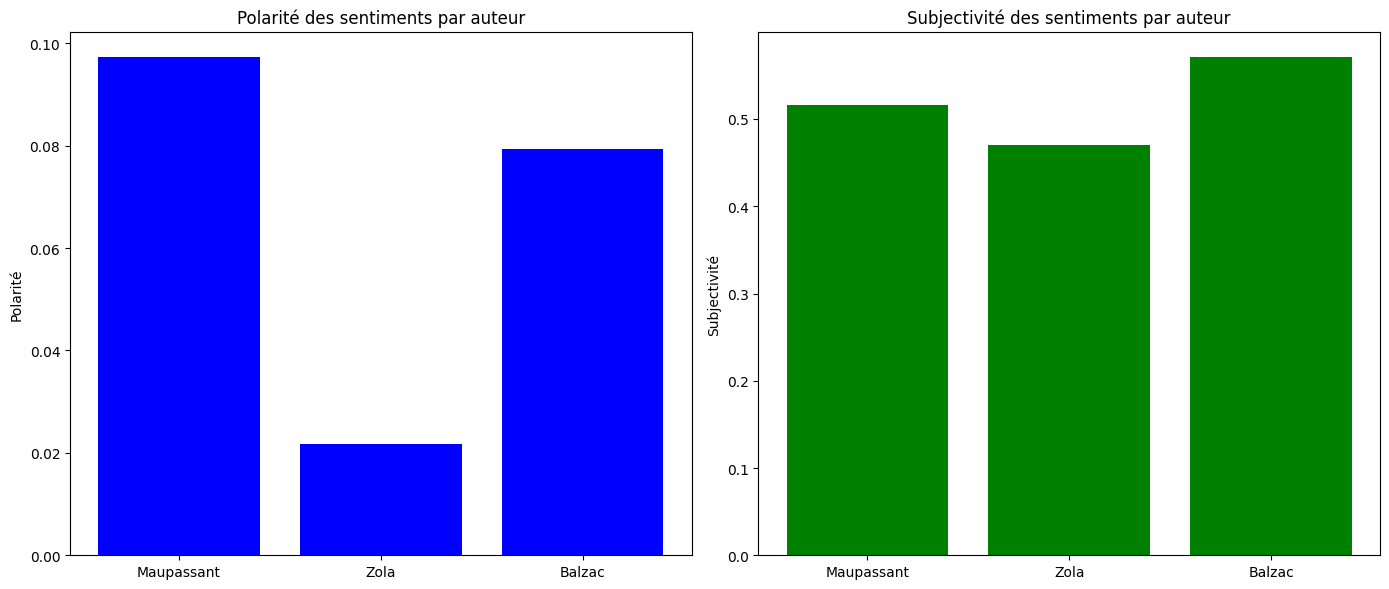

In [37]:
# Visualisation des scores de sentiment moyen
labels = list(sentiment_results.keys())
polarities = [sentiment[0] for sentiment in sentiment_results.values()]
subjectivities = [sentiment[1] for sentiment in sentiment_results.values()]

x = range(len(labels))

plt.figure(figsize=(14, 6))

# Polarité
plt.subplot(1, 2, 1)
plt.bar(x, polarities, color='blue')
plt.xticks(x, labels)
plt.ylabel('Polarité')
plt.title('Polarité des sentiments par auteur')

# Subjectivité
plt.subplot(1, 2, 2)
plt.bar(x, subjectivities, color='green')
plt.xticks(x, labels)
plt.ylabel('Subjectivité')
plt.title('Subjectivité des sentiments par auteur')

plt.tight_layout()
plt.show()
